In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import os
from utilitaire import load_data


In [2]:
def initialisation(n0, n1, n2):
    #Cette fonction iniatilise les variables w et b avec des valeurs aleatoires
    W1 = np.random.randn(n1,n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    params = {
        'w1': W1,
        'b1': b1,
        'w2': W2,
        'b2': b2
    }
    return params

In [3]:
def forward_propagation(X, params):
    Z1 = params['w1'].dot(X) + params['b1']
    A1 = 1/(1 + np.exp(-Z1))
    Z2 = params['w2'].dot(A1) + params['b2']
    A2 = 1/(1 + np.exp(-Z2))
    A = {
        'A1': A1,
        'A2': A2
    }
    return A

In [4]:
def cost_function(A, y):
    epsilon = 1e-15
    return 1/len(y)*np.sum(-y*np.log(A + epsilon) - (1 - y)*np.log(1 - A + epsilon))

In [5]:
def back_propagation(A, X, y, params):
    m = y.shape[1]
    dz2 = A['A2'] - y
    dw2 = 1/m * ( dz2.dot(A['A1'].T) )
    db2 = 1/m * np.sum(dz2, axis=1, keepdims=True)

    dz1 = np.dot(params['w2'].T, dz2) * A['A1'] * (1 - A['A1'])
    dw1 = 1/m * ( dz1.dot(X.T) )
    db1 = 1/m * np.sum(dz1, axis=1, keepdims=True)
    gradient = {
        'dw1': dw1,
        'db1': db1,
        'dw2': dw2,
        'db2': db2
    }
    return gradient

In [6]:
def udpate(gradient, params, rate_learning):
    W1 = params['w1'] - rate_learning * gradient['dw1']
    b1 = params['b1'] - rate_learning * gradient['db1']
    W2 = params['w2'] - rate_learning * gradient['dw2']
    b2 = params['b2'] - rate_learning * gradient['db2']
    params = {
        'w1': W1,
        'b1': b1,
        'w2': W2,
        'b2': b2
    }
    return params


In [7]:
def prediction(X, params):
    A = forward_propagation(X, params)
    return A['A2'] >= 0.5

In [8]:
def neural_network(X, Y, x, y, n1, nbr_iteration = 1000, rate_learning = 0.01):
    n0 = X.shape[0]
    n2 = X.shape[1]
    params = initialisation(n0, n1, n2)

    Lg_train = []
    acc_train = []
    Lg_test = []
    acc_test = []
    Rate = 0
    for i in tqdm(range(nbr_iteration)):
        A = forward_propagation(X, params)      
        if i % 10 ==0:
            #for train
            Lg_train.append(cost_function(A['A2'], Y))
            y_pred = prediction(X, params)
            ym = Y.flatten()
            Rate = accuracy_score(ym, y_pred.flatten()[:ym.shape[0]])
            acc_train.append(Rate)


            A_t = forward_propagation(x, params)
            #for train
            Lg_test.append(cost_function(A_t['A2'], y))
            y_pred = prediction(x, params)
            ym = y.flatten()
            rate = accuracy_score(ym, y_pred.flatten()[:ym.shape[0]])
            acc_test.append(rate)
        
        gradient = back_propagation(A, X, Y, params)  
        params = udpate(gradient, params, rate_learning)


        
    print(Rate)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(Lg_train, label = 'Train Loss')
    plt.plot(Lg_test, label = 'Test Loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(acc_train, label = 'Train Acc')
    plt.plot(acc_test, label = 'Test Acc')
    plt.legend()
    plt.show()
    return params

In [9]:
def show_image(x):
    plt.figure(figsize=(18,8))
    for i in range(1, 15):
        plt.subplot(4, 5, i)
        plt.imshow(x[i], cmap='gray')
        plt.tight_layout()
    plt.show()

In [10]:
def save_model(params):
    
    with open('./datasets/deep_model.data', 'wb') as file:
        myPickler  = pickle.Pickler(params)
        myPickler.dump(params)
        file.close()

In [11]:
def redimension(X_train, Y_train, X_test, Y_test):
    Y_train = Y_train.T
    Y_test = Y_test.T
    X_train =  X_train.T
    X_test = X_test.T

    X_train = X_train.reshape(-1, X_train.shape[-1])/X_train.max()
    X_test = X_test.reshape(-1, X_test.shape[-1])/X_test.max()

    m_train = 300
    m_test = 80

    X_train = X_train[:, :m_train]
    X_test = X_test[:, :m_test]
    Y_train = Y_train[:, :m_train]
    Y_test = Y_test[:, :m_test]

    return  X_train, Y_train, X_test, Y_test

(1000, 64, 64)
(1000, 1)
(200, 64, 64)
(200, 1)


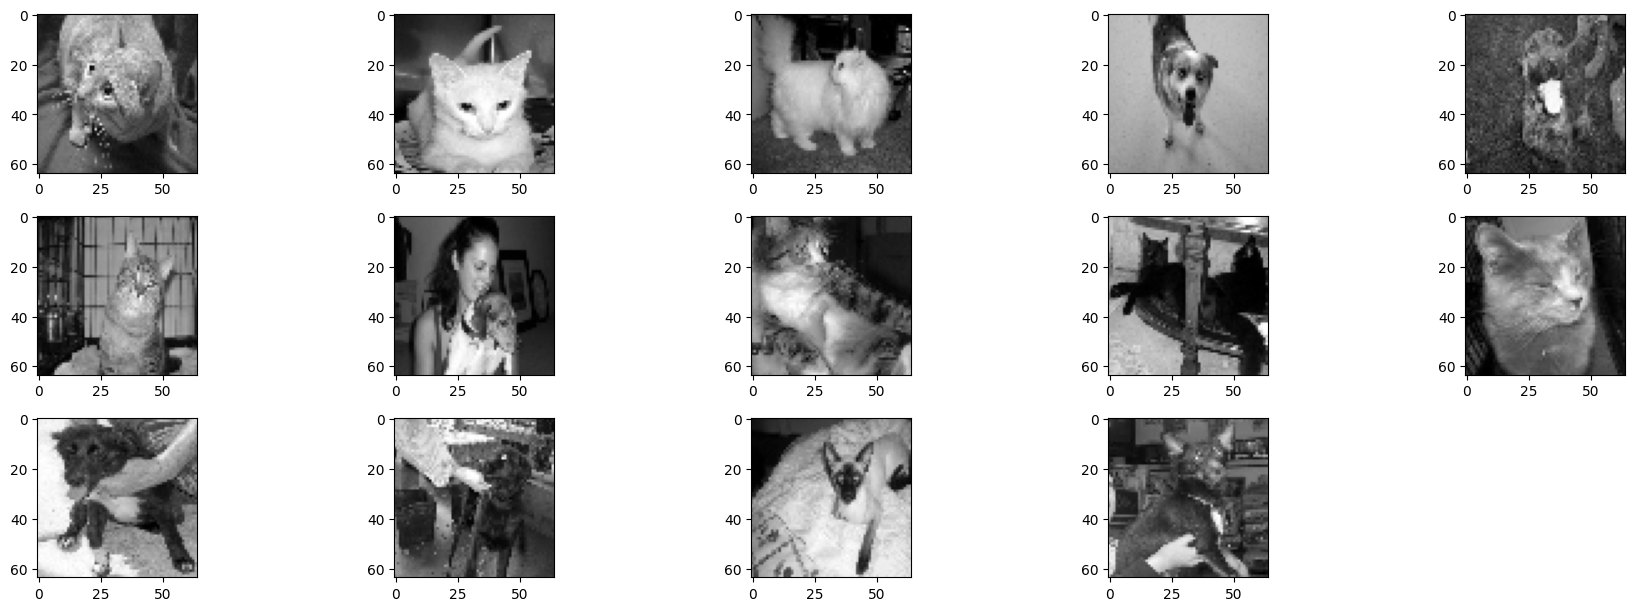

In [12]:
X_train, Y_train, X_test, Y_test = load_data()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
show_image(X_train)


(4096, 300)
(1, 300)
(4096, 80)
(1, 80)


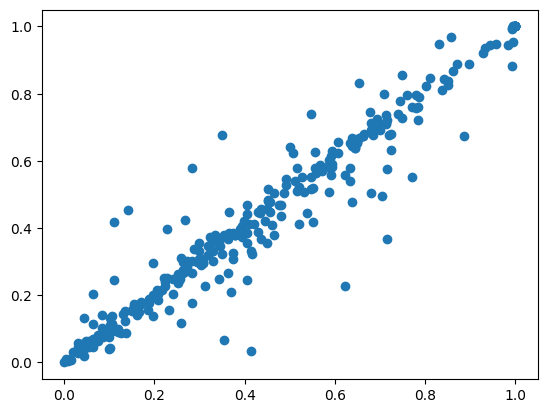

In [13]:
X_train, Y_train, X_test, Y_test = redimension(X_train, Y_train, X_test, Y_test)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

plt.scatter(X_train[0, :], X_train[1, :])
plt.show()




100%|██████████| 1000/1000 [00:30<00:00, 32.58it/s]


0.53


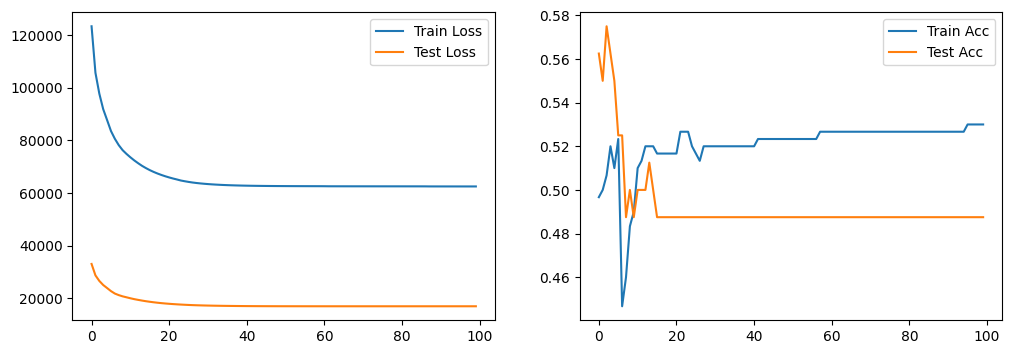

ValueError: too many values to unpack (expected 2)

In [14]:
W, b = neural_network(X_train, Y_train, X_test, Y_test, n1=16)
save_model(W, b)

In [ ]:

with open('./datasets/deep_model.data', 'rb') as file:
    params = pickle.Unpickler(file).load()

params

{'w1': array([[10.54507002,  7.83391601],
        [ 0.61784887,  0.50908833]]),
 'b1': array([[-6.12106213],
        [-0.24653925]]),
 'w2': array([[-1.68604791, -1.27471972],
        [-2.30045408, -0.4079439 ],
        [-1.59678494, -0.94935811],
        [-2.00902121, -0.55720409],
        [-1.55213959,  0.75415196],
        [-2.7774138 ,  0.03141977],
        [-2.35614874,  1.24265256],
        [-1.97247669,  0.3436968 ],
        [-1.96787511,  1.09685372],
        [-2.19414158,  0.06561252],
        [-1.56645379,  2.38877495],
        [-1.59248276, -0.38493852],
        [-2.34205   ,  3.13953249],
        [-2.31194626, -0.81231017],
        [-2.33639854, -0.582501  ],
        [-2.02013671, -0.07353067],
        [-2.83553923,  1.5191749 ],
        [-2.61740431, -0.05112822],
        [-2.54485761, -0.53766384],
        [-1.54642488,  0.30321444],
        [-1.43674125, -0.87415238],
        [-1.93169977,  0.13143977],
        [-2.16429456,  0.27661247],
        [-2.00122606, -0.8488796